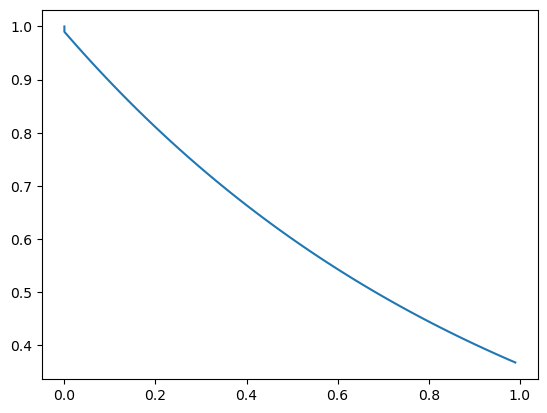

In [34]:
import generalised_lotka_volterra as glv
import numpy as np
from scipy.integrate import RK45
from scipy.integrate._ivp.rk import rk_step
import matplotlib.pyplot as plt

def _rk_step(RKSolver, dt):
    '''
    wraps the rk_step function to take an RKSolver object as an argument
    '''
    return rk_step(RKSolver.fun, RKSolver.t, RKSolver.y, RKSolver.f, dt, RKSolver.A, RKSolver.B, RKSolver.C, RKSolver.K)

def test_ode(t, y):
    return -y

solver = RK45(test_ode, 0, [1], np.inf, rtol=1e-5)

y = [1.0]
t = [0.0]

for _ in range(100):
    dt = 0.01
    y.append(_rk_step(solver, dt)[0][0])
    t.append(solver.t)
    y_new, f_new = _rk_step(solver, dt)
    solver.y = y_new
    solver.t += dt
    solver.f = f_new

plt.plot(t, y)




In [ ]:
class CircularBuffer: 
    def __init__(self, shape, **buffer_kwargs): 
        self.shape = shape
        if isinstance(shape, int): 
            self.principal_length = shape
        elif isinstance(shape, tuple): 
            self.principal_length = shape[0]
        else:
            raise ValueError("shape must be an int or a tuple")
            
        self.buffer = np.zeros(shape, **buffer_kwargs) 
        self.index = 0 

    def append(self, value): 
        self.buffer[self.index] = value 
        self.index = (self.index + 1) % self.principal_length
        
    def get(self): 
        return np.roll(self.buffer, -self.index)
    
    def __repr__(self):
        return str(self.get())
    
# Example usage
buffer = CircularBuffer(5)
for i in range(7):
    buffer.append(i)
    print(buffer.get())


[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1.]
[0. 0. 0. 1. 2.]
[0. 0. 1. 2. 3.]
[0. 1. 2. 3. 4.]
[1. 2. 3. 4. 5.]
[2. 3. 4. 5. 6.]


In [ ]:
from scipy.integrate import solve_ivp
import plotly.graph_objects as go

class CircularBuffer: 
    def __init__(self, shape, fill_value=None, **buffer_kwargs): 
        self.shape = shape
        if isinstance(shape, int): 
            self.principal_length = shape
        elif isinstance(shape, tuple): 
            self.principal_length = shape[0]
        else:
            raise ValueError("shape must be an int or a tuple")
            
        self.buffer = np.full(shape, fill_value=fill_value, **buffer_kwargs) 
        self.index = 0 

    def end(self):
        if self.index==-1:
            return self.buffer[-1]
        return self.buffer[self.index - 1]

    def append(self, value): 
        self.buffer[self.index] = value 
        self.index = (self.index + 1) % self.principal_length
        
    def get(self): 
        return np.r_[self.buffer[self.index:], self.buffer[:self.index]]
        # return np.roll(self.buffer, -self.index)
    
    def __repr__(self):
        return str(self.get())
    

def glv(t, y, alpha):
    return y*(1 - y + alpha@y)

N = 10
alpha = np.random.normal(0, 1/np.sqrt(N), (N, N))

t = CircularBuffer(100)
y = CircularBuffer((100, N))

t.append(0.0)
y.append(np.random.uniform(0, 1, N))

# print(t.get())
# print(y.get())

# print(t.end())
# print(y.end())

# sol = solve_ivp(glv, (0, 100), y0, args=(alpha,), rtol=1e-5, atol=1e-8)

sol_first_half = solve_ivp(glv, (t.end(), t.end() + 1), y.end(), args=(alpha,), rtol=1e-5, atol=1e-8)
# print(sol_first_half.y)

for t_new, y_new in zip(sol_first_half.t, sol_first_half.y.T):
    t.append(t_new)
    y.append(y_new)

sol_second_half = solve_ivp(glv, (t.end(), t.end() + 1), y.end(), args=(alpha,), rtol=1e-5, atol=1e-8)

for t_new, y_new in zip(sol_second_half.t, sol_second_half.y.T):
    t.append(t_new)
    y.append(y_new)

fig = go.Figure()
for i in range(N):
    # fig.add_trace(go.Scatter(x=sol.t, y=sol.y[i], mode='lines'))
    fig.add_trace(go.Scatter(x=t.get(), y=y.get()[:, i], mode='lines', showlegend=False))
    fig.add_trace(go.Scatter(x=sol_first_half.t, y=sol_first_half.y[i], mode='lines', line_width=5, opacity=0.3, showlegend=False))
    # fig.add_trace(go.Scatter(x=sol_second_half.t, y=sol_second_half.y[i], mode='lines', line_width=5, opacity=0.3))

fig.show()


0
0
0
0
0
[None None None None None None None None None None None None None None
 None None None None None None None None None None None None None None
 None None None None None None None None None None None None None None
 None None None None None None None None None None None None None None
 None None None None None None None None None None None None None None
 None None None None None None None None None None None None None None
 None None None None None None None None None None 0.9028486499632724
 0.9028486499632724 0.9002143017758553 0.8733176515149588
 0.8465785104440687 0.8362046804898386]
[0.9028486499632724 0.9002143017758553 0.8733176515149588
 0.8465785104440687 0.8362046804898386]
